In [18]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121 -q
!pip install networkx numpy pandas matplotlib scipy -q

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

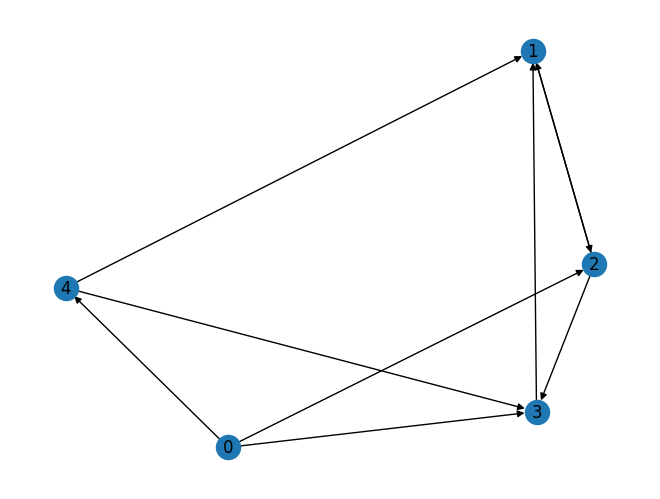

In [11]:
G = nx.DiGraph()
G.add_nodes_from([0, 1, 2, 3, 4])
G.add_edges_from([(0, 2), (0, 4), (0, 3), (1, 2), (2, 1), (2, 3), (3, 1), (4, 3), (4, 1)])
nx.draw(G, with_labels=True)

In [32]:
print('Axis0: to')
print('Axis1: from')
A = nx.adjacency_matrix(G).todense().T
A

Axis0: to
Axis1: from


array([[0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1],
       [1, 1, 0, 0, 0],
       [1, 0, 1, 0, 1],
       [1, 0, 0, 0, 0]], dtype=int32)

In [33]:
G.degree

DiDegreeView({0: 3, 1: 4, 2: 4, 3: 4, 4: 3})

In [34]:
degrees = {i: 0 for i in G.nodes}

for (fr, to) in G.edges: 
    degrees[fr] += 1
print('Degrees:', degrees)

D = np.diag(list(degrees.values()))
D

Degrees: {0: 3, 1: 1, 2: 2, 3: 1, 4: 2}


array([[3, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 2]])

In [36]:
D_inv = np.linalg.inv(D)
print(f'D_inv:\n{D_inv}\n')

M = A @ D_inv
print(f'M:\n{M}')

D_inv:
[[0.33333333 0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.        ]
 [0.         0.         0.5        0.         0.        ]
 [0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         0.5       ]]

M:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.5        1.         0.5       ]
 [0.33333333 1.         0.         0.         0.        ]
 [0.33333333 0.         0.5        0.         0.5       ]
 [0.33333333 0.         0.         0.         0.        ]]


In [37]:
def calculate_transition_matrix(G):
    A = nx.adjacency_matrix(G).todense().T
    degrees = {i: 0 for i in G.nodes}
    for (fr, to) in G.edges: 
        degrees[fr] += 1
    D = np.diag(list(degrees.values()))
    D_inv = np.linalg.inv(D)
    M = A @ D_inv
    return M

In [38]:
M = calculate_transition_matrix(G)

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.5       , 1.        , 0.5       ],
       [0.33333333, 1.        , 0.        , 0.        , 0.        ],
       [0.33333333, 0.        , 0.5       , 0.        , 0.5       ],
       [0.33333333, 0.        , 0.        , 0.        , 0.        ]])

In [39]:
initial = np.ones(len(G.nodes())) / len(G.nodes())
print(0, initial)
for i in range(1, 20):
    initial = M @ initial
    print(i, np.round(initial, 3))

0 [0.2 0.2 0.2 0.2 0.2]
1 [0.    0.4   0.267 0.267 0.067]
2 [0.    0.433 0.4   0.167 0.   ]
3 [0.    0.367 0.433 0.2   0.   ]
4 [0.    0.417 0.367 0.217 0.   ]
5 [0.    0.4   0.417 0.183 0.   ]
6 [0.    0.392 0.4   0.208 0.   ]
7 [0.    0.408 0.392 0.2   0.   ]
8 [0.    0.396 0.408 0.196 0.   ]
9 [0.    0.4   0.396 0.204 0.   ]
10 [0.    0.402 0.4   0.198 0.   ]
11 [0.    0.398 0.402 0.2   0.   ]
12 [0.    0.401 0.398 0.201 0.   ]
13 [0.    0.4   0.401 0.199 0.   ]
14 [0.    0.399 0.4   0.201 0.   ]
15 [0.    0.401 0.399 0.2   0.   ]
16 [0.    0.4   0.401 0.2   0.   ]
17 [0.  0.4 0.4 0.2 0. ]
18 [0.  0.4 0.4 0.2 0. ]
19 [0.  0.4 0.4 0.2 0. ]
